<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [2]:
# Create a new DataFrame 'subset' containing only the relevant columns (release_year, type, genre, duration) for focused analysis

subset = pd.DataFrame(netflix_df[['release_year','type','genre','duration']])
subset

,release_year,type,genre,duration
0,2016,Movie,Dramas,93
1,2011,Movie,Horror Movies,78
2,2009,Movie,Action,80
3,2008,Movie,Dramas,123
4,2016,TV Show,International TV,1
...,...,...,...,...
4807,2009,Movie,Comedies,88
4808,2018,Movie,Dramas,94
4809,2006,Movie,Children,88
4810,2005,Movie,Dramas,99


In [3]:
# Filter the dataset to include only movies released between 1990 and 1999 (inclusive).
# First, subset rows where the release year is in the 1990s.
# Then, further filter to keep only entries where 'type' is "Movie".

nineties = subset[(subset['release_year'] >= 1990) & (subset['release_year'] <= 1999)]
movies_90s = nineties[nineties['type']=="Movie"]
movies_90s

,release_year,type,genre,duration
6,1997,Movie,Dramas,119
118,1993,Movie,Dramas,101
145,1998,Movie,Comedies,82
167,1996,Movie,Comedies,108
194,1993,Movie,Dramas,154
...,...,...,...,...
4672,1999,Movie,Dramas,106
4689,1993,Movie,Classic Movies,118
4718,1999,Movie,Action,106
4746,1994,Movie,Action,191


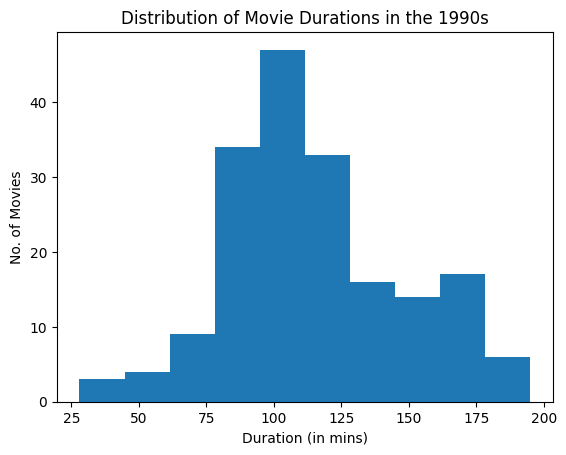

In [4]:
# Visualize the distribution of movie durations for 1990s movies.
# A histogram helps identify the most frequent (common) duration range.

plt.hist(movies_90s['duration'])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (in mins)')
plt.ylabel('No. of Movies')
plt.show()

# Based on the histogram, the most frequent duration is approximately 108 minutes
duration=108

In [5]:
# Count the number of short Action movies released in the 1990s.
# Step 1: Filter movies with duration < 90 minutes (short movies).
short_movie = movies_90s[movies_90s['duration'] < 90] 

# Step 2: From the short movies, select only those with genre "Action".
short_action_movie = short_movie[short_movie['genre'] == 'Action']

# Step 3: Count how many short Action movies exist.
short_movie_count = short_action_movie['duration'].count()

# Display the final count
short_movie_count

7